
<p><a href="https://www.arabcoders.ae/"><img alt="s" src="https://www.arabcoders.ae/frontend_v3/assets/img/logo.png"/></a>
<a href="https://www.udacity.com/"><img alt="a" src="https://cdn.join.com/5b39eb16519cff00234069c1/udacity-logo-l.png"/></a></p>
<h1 id="Investigate-a-Dataset-Project"><strong>Investigate a Dataset Project</strong><a class="anchor-link" href="#Investigate-a-Dataset-Project">¶</a></h1><h3 id="Table-Of-Contents:">Table Of Contents:<a class="anchor-link" href="#Table-Of-Contents:">¶</a></h3><ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<p><a id="intro"></a></p>
<h2 id="Introduction">Introduction<a class="anchor-link" href="#Introduction">¶</a></h2><hr/>
<p></p><p>This mini project investigates and answers some question regarding Film Industry by following the data analysis process.</p><p></p>
<p>The dataset i have chosen to analize is <strong><a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv">TMDb Dataset</a></strong> , which contains information about 10,000 movies<br/> collected from <strong><a href="https://www.themoviedb.org/?language=en-US">The Movie Database (TMDb)</a></strong>.</p>
<p>In this project i'm going to investigate the two production companies with the largest number of produced movies.<br/>For these two companies,<strong>how does the movie duration affects the movie rating?</strong><br/>
Well, let's figure it out. <strong>THREE, TWO , ONE and ACTION!</strong></p>


In [1]:

#importing all the packages needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline




<p><a id="wrangling"></a></p>
<h2 id="Data-Wrangling">Data Wrangling<a class="anchor-link" href="#Data-Wrangling">¶</a></h2>



<p>In this section, i am going to load the data into a dataframe class,displying the data and taking notes on what to do in the following sections.</p>


In [3]:
df=pd.read_csv('tmdb-movies.csv')# loading the date into a dataframe class 

In [4]:
df.head(5) #getting the first five rows of the data

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [5]:
df.info() #informations about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


<ul>
<li>The dataset includes 10866 movies (rows) and 21 variables associated to each movie (columns)</li>
<li>Some variables are of float (4 columns) data type ,others of integer (6 columns) and the rest are stings (11 columns)</li>
<li>Some variables have missing values (NaN values)</li>
<li><p>The ambiguous variables are:</p>
<blockquote><ul>
<li><p>id and imbd_id     : These are unique identifiers for each movie.</p>
</li>
<li><p>popularity         : A numeric quantity specifying the movie popularity.</p>
</li>
<li><p>budget and revenue :The budget in which the movie was made and the worldwide revenue generated by the movie.</p>
</li>
<li><p>budget_adj  and revenue_adj :These are the budget and revenue of the associated movie in terms of 2010                                dollars,accounting for inflation over time.</p>
</li>
<li><p>runtime - The running time of the movie in minutes.</p>
</li>
<li><p>vote_average       : average ratings the movie recieved.</p>
</li>
<li><p>vote_count         : the count of votes recieved.</p>
</li>
</ul>
</blockquote>
</li>
</ul>


In [6]:
pd.options.display.max_columns=30 #displaying all the columns in the data

In [7]:
df.isna().sum().to_frame('nan_number').query('nan_number>0') #columns with nan values

nan_number
imdb_id                       10
cast                          76
homepage                    7930
director                      44
tagline                     2824
keywords                    1493
overview                       4
genres                        23
production_companies        1030


<p>In the previous cell we can see the columns with missing values and the number of these missing vaues in each column.</p>


In [8]:
df.describe()#Generate descriptive statistics of the data

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09


<ul>
<li>50% of the budget and the revenue columns are zero,beside that,the minimum value of the runtime is zero.These values make no sense!!</li>
<li>The range of the release date is from 1960 (minimum value) to 2015 (max value).</li>
</ul>


In [9]:
#descriptive statistics of the data after excluding zero values from the revenue and budget columns 
df.query('revenue>0 & budget>0').describe() 

id   popularity        budget       revenue      runtime  \
count    3855.000000  3855.000000  3.855000e+03  3.855000e+03  3855.000000   
mean    39888.783398     1.191400  3.720183e+07  1.076589e+08   109.215824   
std     67213.815955     1.475002  4.220291e+07  1.765248e+08    19.922166   
min         5.000000     0.001117  1.000000e+00  2.000000e+00    15.000000   
25%      6074.000000     0.462448  1.000000e+07  1.357645e+07    95.000000   
50%     11322.000000     0.797298  2.400000e+07  4.479322e+07   106.000000   
75%     38577.000000     1.368245  5.000000e+07  1.241530e+08   119.000000   
max    417859.000000    32.985763  4.250000e+08  2.781506e+09   338.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  3855.000000    3855.00000   3855.000000  3.855000e+03  3.855000e+03  
mean    527.611933       6.16786   2001.263294  4.423630e+07  1.370294e+08  
std     879.868374       0.79504     11.281989  4.480403e+07  2.160944e+08  
min      10.000000       2.20000   1960.000000  9.693980e-01  2.370705e+00  
25%      71.000000       5.70000   1995.000000  1.309053e+07  1.834123e+07  
50%     204.000000       6.20000   2004.000000  3.001558e+07  6.171861e+07  
75%     580.000000       6.70000   2010.000000  6.061307e+07  1.632401e+08  
max    9767.000000       8.40000   2015.000000  4.250000e+08  2.827124e+09

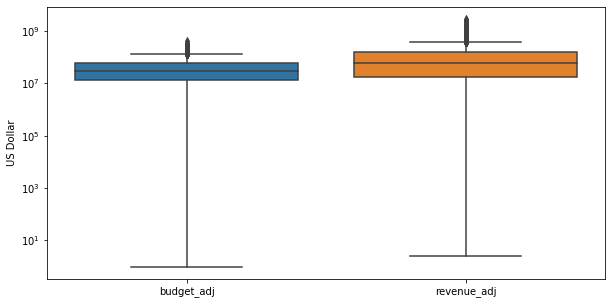

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.query('revenue_adj>0 & budget_adj>0').iloc[:,-2:])
plt.yscale('log')
plt.ylabel('US Dollar');


<p>After excluding the zeros from the budget and revenue columns from the minimum values and the box plot we can tell that some values are less than ten dollars!!
So, i am not using the revenue and budget varables in my analysis.</p>



<h3 id="Data-Cleaning">Data Cleaning<a class="anchor-link" href="#Data-Cleaning">¶</a></h3>



<p>In this section,i am going to clean the data and having it ready to the exploratory section.</p>


In [11]:
#dropping columns that are of no use
dropped_columns=['popularity','budget','revenue','tagline','homepage','overview','revenue_adj','budget_adj']
df_cleaned=df.drop(columns=dropped_columns).copy()
df_cleaned.head(1)

id    imdb_id  original_title  \
0  135397  tt0369610  Jurassic World   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   

   vote_average  release_year  
0           6.5          2015

In [12]:
df_cleaned.drop_duplicates(inplace=True)#dropping dupplicaled rows

In [13]:

df_cleaned['id']=df_cleaned.id.apply(lambda x:'https://www.themoviedb.org/movie/{0}'.format(x) if pd.notna(x) else 'missing')
df_cleaned.rename(columns={'id':'tmdb_webpage'},inplace=True)
df_cleaned.loc[0]



tmdb_webpage                      https://www.themoviedb.org/movie/135397
imdb_id                                                         tt0369610
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                                  Colin Trevorrow
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
runtime                                                               124
genres                          Action|Adventure|Science Fiction|Thriller
production_companies    Universal Studios|Amblin Entertainment|Legenda...
release_date                                                       6/9/15
vote_count                                                           5562
vote_average                                                          6.5
release_year                                                         2015
Name: 0, dtype: object

In [14]:

df_cleaned['imdb_id']=df_cleaned.imdb_id.apply(lambda x:'https://www.imdb.com/title/{0}/'.format(x) if pd.notna(x) else 'missing')
df_cleaned.rename(columns={'imdb_id':'imdb_webpage'},inplace=True)
df_cleaned.loc[0]



tmdb_webpage                      https://www.themoviedb.org/movie/135397
imdb_webpage                        https://www.imdb.com/title/tt0369610/
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                                  Colin Trevorrow
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
runtime                                                               124
genres                          Action|Adventure|Science Fiction|Thriller
production_companies    Universal Studios|Amblin Entertainment|Legenda...
release_date                                                       6/9/15
vote_count                                                           5562
vote_average                                                          6.5
release_year                                                         2015
Name: 0, dtype: object


<p>Replacing the 'id' and 'imdb_id' values with the webpage of the movie, so we have two useful variables insteade of id's.</p>


In [15]:

columns=['cast','director','keywords','genres','production_companies']
for i in columns:
    df_cleaned[i]=df_cleaned[i].apply(lambda x: tuple(x.split("|")) if type(x)==str else ())
df_cleaned.head(1)



tmdb_webpage  \
0  https://www.themoviedb.org/movie/135397   

                            imdb_webpage  original_title  \
0  https://www.imdb.com/title/tt0369610/  Jurassic World   

                                                cast            director  \
0  (Chris Pratt, Bryce Dallas Howard, Irrfan Khan...  (Colin Trevorrow,)   

                                            keywords  runtime  \
0  (monster, dna, tyrannosaurus rex, velociraptor...      124   

                                           genres  \
0  (Action, Adventure, Science Fiction, Thriller)   

                                production_companies release_date  vote_count  \
0  (Universal Studios, Amblin Entertainment, Lege...       6/9/15        5562   

   vote_average  release_year  
0           6.5          2015


<p>splitting the ('cast','director','keywords','genres','production_companies') columns into tuples so it's easy to do the analysis on them.</p>


In [16]:

release_date= df_cleaned.release_date.str[:-2] + df_cleaned.release_year.astype(str)
release_date



0          6/9/2015
1         5/13/2015
2         3/18/2015
3        12/15/2015
4          4/1/2015
            ...    
10861     6/15/1966
10862    12/21/1966
10863      1/1/1966
10864     11/2/1966
10865    11/15/1966
Length: 10865, dtype: object

In [17]:

release_date=pd.to_datetime(release_date)
release_date



0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Length: 10865, dtype: datetime64[ns]

In [18]:

df_cleaned['release_date']=release_date
df_cleaned.drop(columns='release_year',inplace=True)
df_cleaned.head(1)



tmdb_webpage  \
0  https://www.themoviedb.org/movie/135397   

                            imdb_webpage  original_title  \
0  https://www.imdb.com/title/tt0369610/  Jurassic World   

                                                cast            director  \
0  (Chris Pratt, Bryce Dallas Howard, Irrfan Khan...  (Colin Trevorrow,)   

                                            keywords  runtime  \
0  (monster, dna, tyrannosaurus rex, velociraptor...      124   

                                           genres  \
0  (Action, Adventure, Science Fiction, Thriller)   

                                production_companies release_date  vote_count  \
0  (Universal Studios, Amblin Entertainment, Lege...   2015-06-09        5562   

   vote_average  
0           6.5


<p>Replacing the release_date and release_year with one variable called release_data of datetime class.</p>


In [19]:

df_cleaned['runtime']=pd.to_timedelta(df_cleaned.runtime,unit='m')
df_cleaned.runtime



0       02:04:00
1       02:00:00
2       01:59:00
3       02:16:00
4       02:17:00
          ...   
10861   01:35:00
10862   02:56:00
10863   01:34:00
10864   01:20:00
10865   01:14:00
Name: runtime, Length: 10865, dtype: timedelta64[ns]


<p>Converting runtime values from intgers of minutes to timedelta class.</p>



<hr/>



<p></p><p>We need to replace the vote_average values with weighted values using the count values since it's not fair that some movies with heigh vote count have the same vote_average of other movies with less vote count.</p><p></p>
<p></p><p>For achiving this i'm gonna use the IMDB's weighted rating (wr) formula:</p><p>
    vote_weighted= (v Ã· (v+m)) Ã— R + (m Ã· (v+m)) Ã— C</p>
<p>where:</p>
<ul>
<li>R = average for the movie (mean) = (Rating)</li>
<li>v = number of votes for the movie = (votes)</li>
<li>m = minimum votes required to be listed in the chart</li>
<li>C = the mean vote across the whole report</li>
</ul>


In [20]:

v=df_cleaned.vote_count
R=df_cleaned.vote_average



In [21]:

C=df_cleaned.vote_average.mean()
C



5.975011504832047

In [22]:

m=df.vote_count.quantile(0.9)# a movie to be listed in the chart needed to get votes more than 90% of the other movies 
m



508.0

In [23]:

vote_weighted=( v/ (v+m) ) * R +( m/ (v+m) ) * C
vote_weighted



0        6.456064
1        7.014613
2        6.244748
3        7.366432
4        7.105183
           ...   
10861    6.005214
10862    5.964594
10863    5.986138
10864    5.951143
10865    5.846665
Length: 10865, dtype: float64

In [24]:

df_cleaned['vote_weighted']=round(vote_weighted,1)
df_cleaned.head(1)



tmdb_webpage  \
0  https://www.themoviedb.org/movie/135397   

                            imdb_webpage  original_title  \
0  https://www.imdb.com/title/tt0369610/  Jurassic World   

                                                cast            director  \
0  (Chris Pratt, Bryce Dallas Howard, Irrfan Khan...  (Colin Trevorrow,)   

                                            keywords  runtime  \
0  (monster, dna, tyrannosaurus rex, velociraptor... 02:04:00   

                                           genres  \
0  (Action, Adventure, Science Fiction, Thriller)   

                                production_companies release_date  vote_count  \
0  (Universal Studios, Amblin Entertainment, Lege...   2015-06-09        5562   

   vote_average  vote_weighted  
0           6.5            6.5

In [25]:

df_cleaned.drop(columns='vote_average',inplace=True)
df_cleaned.head(1)



tmdb_webpage  \
0  https://www.themoviedb.org/movie/135397   

                            imdb_webpage  original_title  \
0  https://www.imdb.com/title/tt0369610/  Jurassic World   

                                                cast            director  \
0  (Chris Pratt, Bryce Dallas Howard, Irrfan Khan...  (Colin Trevorrow,)   

                                            keywords  runtime  \
0  (monster, dna, tyrannosaurus rex, velociraptor... 02:04:00   

                                           genres  \
0  (Action, Adventure, Science Fiction, Thriller)   

                                production_companies release_date  vote_count  \
0  (Universal Studios, Amblin Entertainment, Lege...   2015-06-09        5562   

   vote_weighted  
0            6.5


<hr/>


In [26]:

df_cleaned



tmdb_webpage  \
0      https://www.themoviedb.org/movie/135397   
1       https://www.themoviedb.org/movie/76341   
2      https://www.themoviedb.org/movie/262500   
3      https://www.themoviedb.org/movie/140607   
4      https://www.themoviedb.org/movie/168259   
...                                        ...   
10861      https://www.themoviedb.org/movie/21   
10862   https://www.themoviedb.org/movie/20379   
10863   https://www.themoviedb.org/movie/39768   
10864   https://www.themoviedb.org/movie/21449   
10865   https://www.themoviedb.org/movie/22293   

                                imdb_webpage                original_title  \
0      https://www.imdb.com/title/tt0369610/                Jurassic World   
1      https://www.imdb.com/title/tt1392190/            Mad Max: Fury Road   
2      https://www.imdb.com/title/tt2908446/                     Insurgent   
3      https://www.imdb.com/title/tt2488496/  Star Wars: The Force Awakens   
4      https://www.imdb.com/title/tt2820852/                     Furious 7   
...                                      ...                           ...   
10861  https://www.imdb.com/title/tt0060371/            The Endless Summer   
10862  https://www.imdb.com/title/tt0060472/                    Grand Prix   
10863  https://www.imdb.com/title/tt0060161/           Beregis Avtomobilya   
10864  https://www.imdb.com/title/tt0061177/        What's Up, Tiger Lily?   
10865  https://www.imdb.com/title/tt0060666/      Manos: The Hands of Fate   

                                                    cast  \
0      (Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   
1      (Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...   
2      (Shailene Woodley, Theo James, Kate Winslet, A...   
3      (Harrison Ford, Mark Hamill, Carrie Fisher, Ad...   
4      (Vin Diesel, Paul Walker, Jason Statham, Miche...   
...                                                  ...   
10861  (Michael Hynson, Robert August, Lord 'Tally Ho...   
10862  (James Garner, Eva Marie Saint, Yves Montand, ...   
10863  (Innokentiy Smoktunovskiy, Oleg Efremov, Georg...   
10864  (Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama,...   
10865  (Harold P. Warren, Tom Neyman, John Reynolds, ...   

                    director  \
0         (Colin Trevorrow,)   
1           (George Miller,)   
2        (Robert Schwentke,)   
3             (J.J. Abrams,)   
4               (James Wan,)   
...                      ...   
10861         (Bruce Brown,)   
10862  (John Frankenheimer,)   
10863      (Eldar Ryazanov,)   
10864         (Woody Allen,)   
10865    (Harold P. Warren,)   

                                                keywords  runtime  \
0      (monster, dna, tyrannosaurus rex, velociraptor... 02:04:00   
1      (future, chase, post-apocalyptic, dystopia, au... 02:00:00   
2      (based on novel, revolution, dystopia, sequel,... 01:59:00   
3            (android, spaceship, jedi, space opera, 3d) 02:16:00   
4              (car race, speed, revenge, suspense, car) 02:17:00   
...                                                  ...      ...   
10861                       (surfer, surfboard, surfing) 01:35:00   
10862                      (car race, racing, formula 1) 02:56:00   
10863                       (car, trolley, stealing car) 01:34:00   
10864                                           (spoof,) 01:20:00   
10865          (fire, gun, drive, sacrifice, flashlight) 01:14:00   

                                               genres  \
0      (Action, Adventure, Science Fiction, Thriller)   
1      (Action, Adventure, Science Fiction, Thriller)   
2              (Adventure, Science Fiction, Thriller)   
3       (Action, Adventure, Science Fiction, Fantasy)   
4                           (Action, Crime, Thriller)   
...                                               ...   
10861                                  (Documentary,)   
10862                      (Action, Adventure, Drama)   
10863                               (Mystery, Co


<p>The data is well cleaned but ......</p>


In [27]:
df_cleaned.isna().any()

tmdb_webpage            False
imdb_webpage            False
original_title          False
cast                    False
director                False
keywords                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_weighted           False
dtype: bool


<p>Even though,the cell above shows that no columns have NaN values but the cast,director,keywords,geners and production_companies columns have tuples of zero size.</p>


In [28]:
for i in columns:
    df_cleaned[i+'_count']=df_cleaned[i].apply(lambda x:len(x))
df_cleaned.head(1)

tmdb_webpage  \
0  https://www.themoviedb.org/movie/135397   

                            imdb_webpage  original_title  \
0  https://www.imdb.com/title/tt0369610/  Jurassic World   

                                                cast            director  \
0  (Chris Pratt, Bryce Dallas Howard, Irrfan Khan...  (Colin Trevorrow,)   

                                            keywords  runtime  \
0  (monster, dna, tyrannosaurus rex, velociraptor... 02:04:00   

                                           genres  \
0  (Action, Adventure, Science Fiction, Thriller)   

                                production_companies release_date  vote_count  \
0  (Universal Studios, Amblin Entertainment, Lege...   2015-06-09        5562   

   vote_weighted  cast_count  director_count  keywords_count  genres_count  \
0            6.5           5               1               5             4   

   production_companies_count  
0                           5


<p>I am going to follow another approach dealing with NaN values in these columns by adding another columns with values of the tuples' sizes.And using the query methoed whenever NaN values needed to be excluded.</p>


In [29]:
df_cleaned.query('cast_count>0') #dataframe with no NaN values in the cast column

tmdb_webpage  \
0      https://www.themoviedb.org/movie/135397   
1       https://www.themoviedb.org/movie/76341   
2      https://www.themoviedb.org/movie/262500   
3      https://www.themoviedb.org/movie/140607   
4      https://www.themoviedb.org/movie/168259   
...                                        ...   
10861      https://www.themoviedb.org/movie/21   
10862   https://www.themoviedb.org/movie/20379   
10863   https://www.themoviedb.org/movie/39768   
10864   https://www.themoviedb.org/movie/21449   
10865   https://www.themoviedb.org/movie/22293   

                                imdb_webpage                original_title  \
0      https://www.imdb.com/title/tt0369610/                Jurassic World   
1      https://www.imdb.com/title/tt1392190/            Mad Max: Fury Road   
2      https://www.imdb.com/title/tt2908446/                     Insurgent   
3      https://www.imdb.com/title/tt2488496/  Star Wars: The Force Awakens   
4      https://www.imdb.com/title/tt2820852/                     Furious 7   
...                                      ...                           ...   
10861  https://www.imdb.com/title/tt0060371/            The Endless Summer   
10862  https://www.imdb.com/title/tt0060472/                    Grand Prix   
10863  https://www.imdb.com/title/tt0060161/           Beregis Avtomobilya   
10864  https://www.imdb.com/title/tt0061177/        What's Up, Tiger Lily?   
10865  https://www.imdb.com/title/tt0060666/      Manos: The Hands of Fate   

                                                    cast  \
0      (Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   
1      (Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...   
2      (Shailene Woodley, Theo James, Kate Winslet, A...   
3      (Harrison Ford, Mark Hamill, Carrie Fisher, Ad...   
4      (Vin Diesel, Paul Walker, Jason Statham, Miche...   
...                                                  ...   
10861  (Michael Hynson, Robert August, Lord 'Tally Ho...   
10862  (James Garner, Eva Marie Saint, Yves Montand, ...   
10863  (Innokentiy Smoktunovskiy, Oleg Efremov, Georg...   
10864  (Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama,...   
10865  (Harold P. Warren, Tom Neyman, John Reynolds, ...   

                    director  \
0         (Colin Trevorrow,)   
1           (George Miller,)   
2        (Robert Schwentke,)   
3             (J.J. Abrams,)   
4               (James Wan,)   
...                      ...   
10861         (Bruce Brown,)   
10862  (John Frankenheimer,)   
10863      (Eldar Ryazanov,)   
10864         (Woody Allen,)   
10865    (Harold P. Warren,)   

                                                keywords  runtime  \
0      (monster, dna, tyrannosaurus rex, velociraptor... 02:04:00   
1      (future, chase, post-apocalyptic, dystopia, au... 02:00:00   
2      (based on novel, revolution, dystopia, sequel,... 01:59:00   
3            (android, spaceship, jedi, space opera, 3d) 02:16:00   
4              (car race, speed, revenge, suspense, car) 02:17:00   
...                                                  ...      ...   
10861                       (surfer, surfboard, surfing) 01:35:00   
10862                      (car race, racing, formula 1) 02:56:00   
10863                       (car, trolley, stealing car) 01:34:00   
10864                                           (spoof,) 01:20:00   
10865          (fire, gun, drive, sacrifice, flashlight) 01:14:00   

                                               genres  \
0      (Action, Adventure, Science Fiction, Thriller)   
1      (Action, Adventure, Science Fiction, Thriller)   
2              (Adventure, Science Fiction, Thriller)   
3       (Action, Adventure, Science Fiction, Fantasy)   
4                           (Action, Crime, Thriller)   
...                                               ...   
10861                                  (Documentary,)   
10862                      (Action, Adventure, Drama)   
10863                               (Mystery, Co


<p><a id="eda"></a></p>
<h1 id="Exploratory-Data-Analysis">Exploratory Data Analysis<a class="anchor-link" href="#Exploratory-Data-Analysis">¶</a></h1>



<p>In this section i'm gonna try to answer the question posed recently and do some other exploratory analysis on the data.</p>



<h3 id="How-does-the-movie-duration-affects-the-movie-rating?">How does the movie duration affects the movie rating?<a class="anchor-link" href="#How-does-the-movie-duration-affects-the-movie-rating?">¶</a></h3>


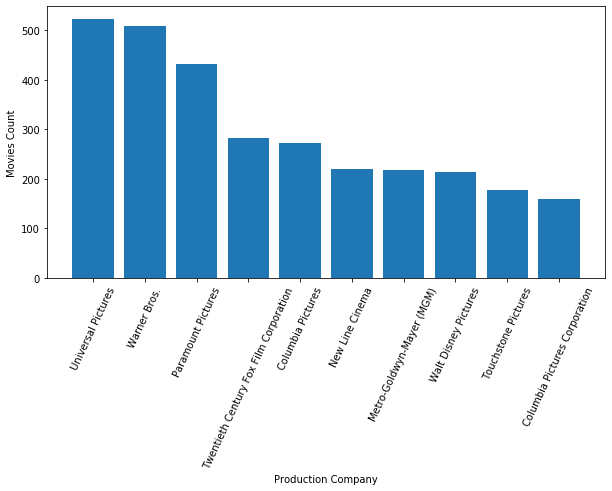

In [30]:
#ploting count plot that shows the top 10 production companies with largest produced movies
top_10_companies=df_cleaned.production_companies.explode().value_counts().head(10)
plt.figure(figsize=(10,5))
plt.bar(top_10_companies.index , height= top_10_companies.values)
plt.xticks(rotation=65)
plt.xlabel('Production Company')
plt.ylabel('Movies Count');

In [31]:
#getting the top 2 production companies with the largest produced movies
production_companies=list(top_10_companies.head(2).index)
production_companies



['Universal Pictures', 'Warner Bros.']


<p>So,the two companies with the largest produced movies which i am going to investigate are Universal Pictures and Warners Bros.</p>


In [32]:
#bool series of the index of the movies produced by Universal Pictures.
universal_pictures=df_cleaned.production_companies.apply(lambda x:bool(set(x) & set([production_companies[0]])))
#bool series of the index of the movies produced by Warner Bros.
warner_brothers=df_cleaned.production_companies.apply(lambda x:bool(set(x) & set([production_companies[1]])))



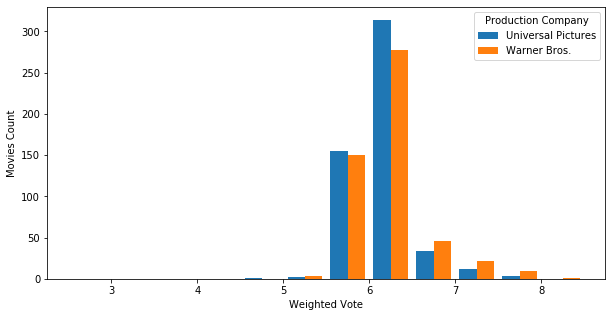

In [33]:
#histogram showing the distribution of the movies rating for the two companies
bins_vote=np.arange(2.5,9,0.5) # each bin is of 0.5 rating 
universal_pictures_vote=df_cleaned[universal_pictures].vote_weighted
warner_brothers_vote=df_cleaned[warner_brothers].vote_weighted
plt.figure(figsize=(10,5))
plt.hist(x=[universal_pictures_vote,warner_brothers_vote],label=['Universal Pictures','Warner Bros.'],
          bins=bins_vote)
plt.ylabel('Movies Count')
plt.legend(title='Production Company')
plt.xlabel('Weighted Vote')
plt.show()




<p><strong>From the histogram above</strong></p>
<ul>
<li><strong>Warner Bros. has more movies with ratings larger than 6.5 than Universal Pictures</strong></li>
<li><strong>Universal Pictures has more movies with ratings less than 6.5 than Warner Bros.</strong></li>
<li><strong>Universal Pictures got movies with ratings equal or less than 5 while Warner Bros. doesn't</strong></li>
<li><strong>Warner Bros. got movies with ratings equal or larger than 8 while Universal Pictures doesn't</strong></li>
</ul>


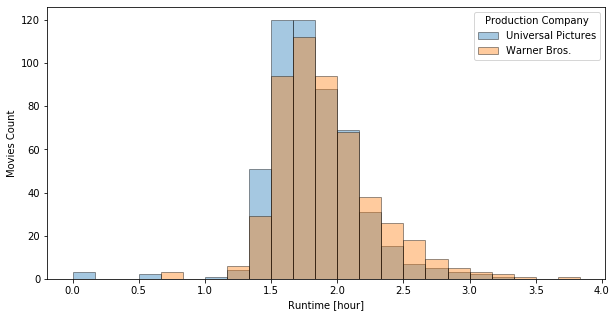

In [34]:

#histogram showing the distribution of the movies duration for the two companies
df_cleaned['runtime']=pd.to_timedelta(df['runtime'],unit='m')
one_hour=np.timedelta64(1,'h')
runtime_bins=np.arange(0,4,10/60) # each bin is of 10 minutes duration
plt.figure(figsize=(10,5))
sns.distplot(df_cleaned[universal_pictures].runtime/one_hour,bins=runtime_bins,kde=False,label='Universal Pictures',
              hist_kws={'edgecolor':'black'})

sns.distplot(df_cleaned[warner_brothers].runtime/one_hour,bins=runtime_bins,kde=False,label='Warner Bros.',
              hist_kws={'edgecolor':'black'});
plt.xlabel('Runtime [hour]')
plt.ylabel('Movies Count')
plt.legend(title='Production Company')
plt.show()




<p><strong>From the histogram above</strong></p>
<ul>
<li><strong>Warner Bros. has more movies with longer duration than Universal Pictures</strong></li>
<li><strong>Universal Pictures has more movies with shorter duration than Warner Bros.</strong></li>
<li><strong>Universal Pictures got movies with duration less than 10 minutes while Warner Bros. doesn't</strong></li>
<li><strong>Warner Bros. got movies with duration longer than 3 hours and 20 minutes while Universal Pictures doesn't</strong></li>
</ul>


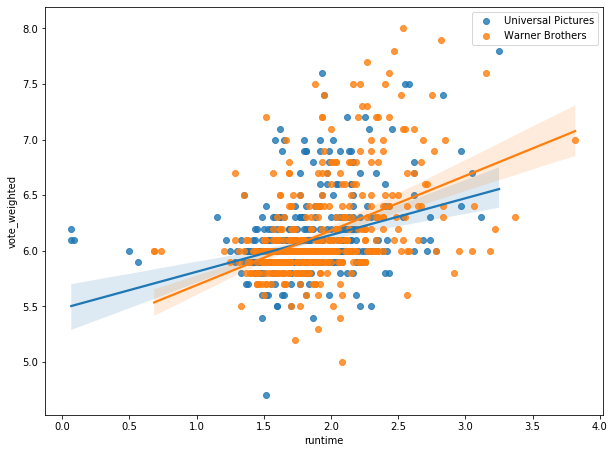

In [35]:

#regretion plot showing the relation between the movies rating and duration

df_cleaned['runtime']=df_cleaned.runtime/one_hour
plt.figure(figsize=(10,7.5))
sns.regplot(data=df_cleaned[universal_pictures],x='runtime',y='vote_weighted',label='Universal Pictures')
sns.regplot(data=df_cleaned[warner_brothers],x='runtime',y='vote_weighted',label='Warner Brothers')
plt.legend()
plt.show()



In [36]:

df_cleaned['runtime']=df['runtime']
universal_pictures_corr=df_cleaned[universal_pictures].corr()['runtime']['vote_weighted']
warner_brothers_corr=df_cleaned[warner_brothers].corr()['runtime']['vote_weighted']
print('Universal Pictures corr:',universal_pictures_corr)
print('Warner Bros. corr:',warner_brothers_corr)



Universal Pictures corr: 0.35303731285374645
Warner Bros. corr: 0.45086225019751874



<p><strong>From the regression plot and the correlation coefficient of the runtime and the vote_weighted above:</strong></p>
<ul>
<li><strong>The two companies are more likely to get higher ratings for longer movies and lower ratings for shorter movies</strong></li>
<li><strong>Warner Bros. is more likely to get higher ratings for longer movies than Universal Pictures</strong></li>
<li><strong>Universal Pictures is more likely to get lower higher for shorter movies than  Warner Bros.</strong></li>
</ul>



<hr/>



<p>The plots below shows the top genres,cast,keywords and director for each of the two companies.</p>


In [37]:

cast_warner=df_cleaned[warner_brothers].cast.explode().value_counts().head(10).index
genres_warner=df_cleaned[warner_brothers].genres.explode().value_counts().index
director_warner=df_cleaned[warner_brothers].director.explode().value_counts().head(10).index
keywords_warner=df_cleaned[warner_brothers].keywords.explode().value_counts().head(10).index



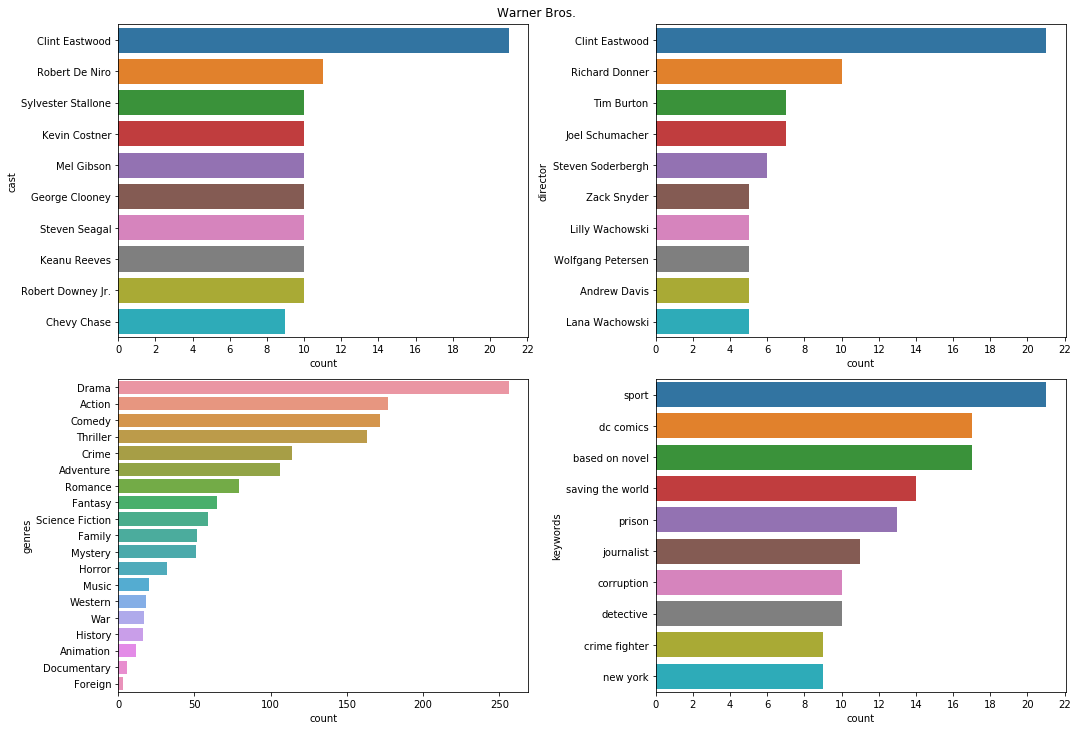

In [38]:

fig,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(y=df_cleaned[warner_brothers].cast.explode(),order=cast_warner,ax=ax[0][0])
sns.countplot(y=df_cleaned[warner_brothers].director.explode(),order=director_warner,ax=ax[0][1])
sns.countplot(y=df_cleaned[warner_brothers].genres.explode(),order=genres_warner,ax=ax[1][0])
sns.countplot(y=df_cleaned[warner_brothers].keywords.explode(),order=keywords_warner,ax=ax[1][1])
plt.tight_layout()
fig.suptitle('Warner Bros.',x=0.5,y=1.01)
ax[0][0].set_xticks(np.arange(0,24,2))
ax[0][1].set_xticks(np.arange(0,24,2))
ax[1][1].set_xticks(np.arange(0,24,2))
plt.show()



In [40]:

cast_universal=df_cleaned[universal_pictures].cast.explode().value_counts().head(10).index
genres_universal=df_cleaned[universal_pictures].genres.explode().value_counts().index
director_universal=df_cleaned[universal_pictures].director.explode().value_counts().head(10).index
keywords_universal=df_cleaned[universal_pictures].keywords.explode().value_counts().head(10).index



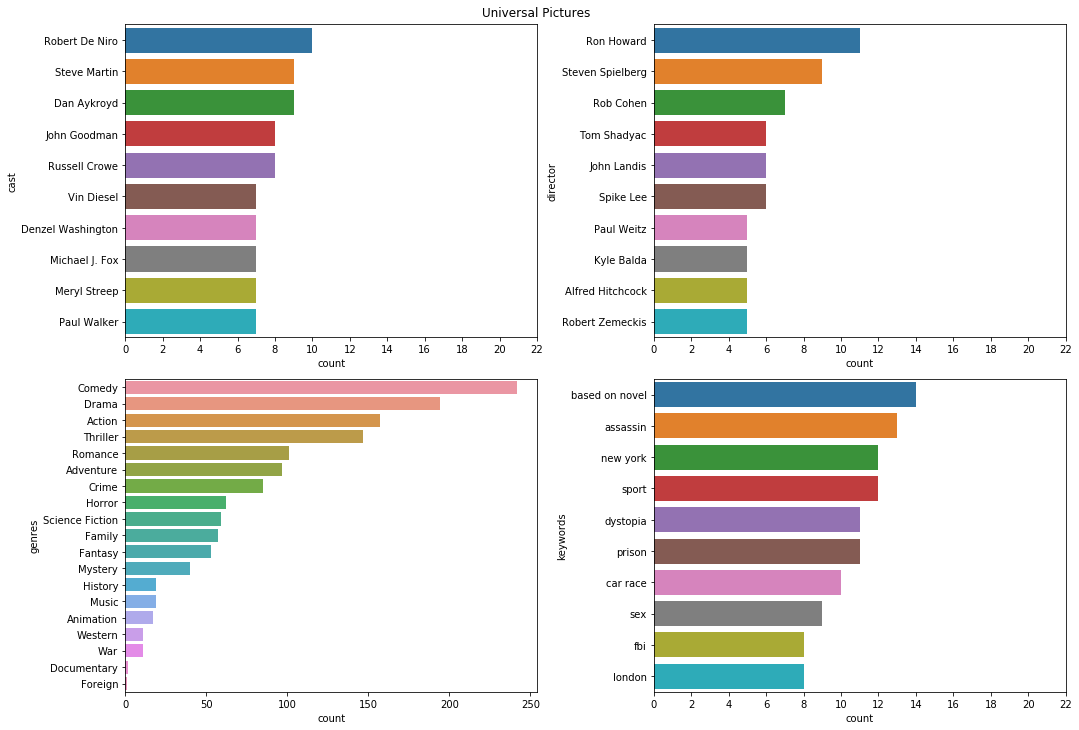

In [41]:

fig,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(y=df_cleaned[universal_pictures].cast.explode(),order=cast_universal,ax=ax[0][0])
sns.countplot(y=df_cleaned[universal_pictures].director.explode(),order=director_universal,ax=ax[0][1])
sns.countplot(y=df_cleaned[universal_pictures].genres.explode(),order=genres_universal,ax=ax[1][0])
sns.countplot(y=df_cleaned[universal_pictures].keywords.explode(),order=keywords_universal,ax=ax[1][1])
plt.tight_layout()
fig.suptitle('Universal Pictures',x=0.5,y=1.01)
ax[0][0].set_xticks(np.arange(0,24,2))
ax[0][1].set_xticks(np.arange(0,24,2))
ax[1][1].set_xticks(np.arange(0,24,2))
plt.show()




<h2 id="What-is-the-number-of-movies-released-from-day-to-another-and-from-month-to-another?">What is the number of movies released from day to another and from month to another?<a class="anchor-link" href="#What-is-the-number-of-movies-released-from-day-to-another-and-from-month-to-another?">¶</a></h2>


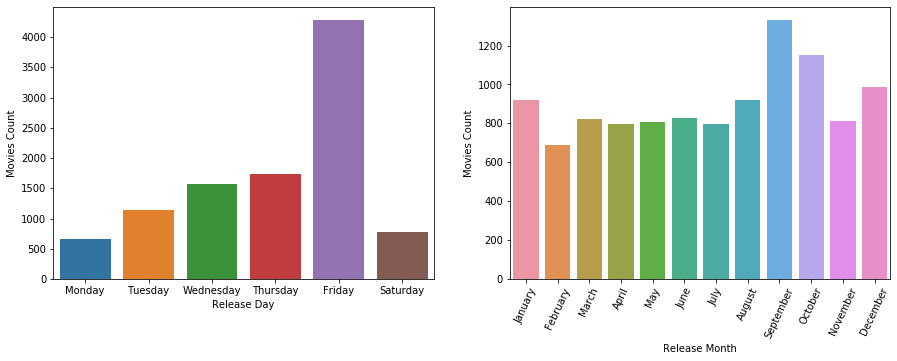

In [42]:

weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
year_months=['January','February','March','April','May','June','July','August','September','October','November','December']
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_cleaned.release_date.dt.day_name(),order=weekdays,ax=ax[0])
sns.countplot(df_cleaned.release_date.dt.month_name(),order=year_months,ax=ax[1])
ax[0].set_xlabel('Release Day')
ax[1].set_xlabel('Release Month')
ax[0].set_ylabel('Movies Count')
ax[1].set_ylabel('Movies Count')
plt.xticks(rotation=65)
plt.show()




<p>The count plots above shows that Friday is the day with higher number of released movies and September is the higher month.</p>



<h2 id="what-are-the-most-frequent-keywords?">what are the most frequent keywords?<a class="anchor-link" href="#what-are-the-most-frequent-keywords?">¶</a></h2>



<p>I am going to use the WordCould package to answer this question.<br/>The world cloud image shows the top 250 frequent,each word has a size that is directly proprtional to its frequency.</p>


In [43]:

keywords=df_cleaned.keywords.explode().dropna().str.replace(' ','_')
keywords=','.join([str(x) for x in keywords])



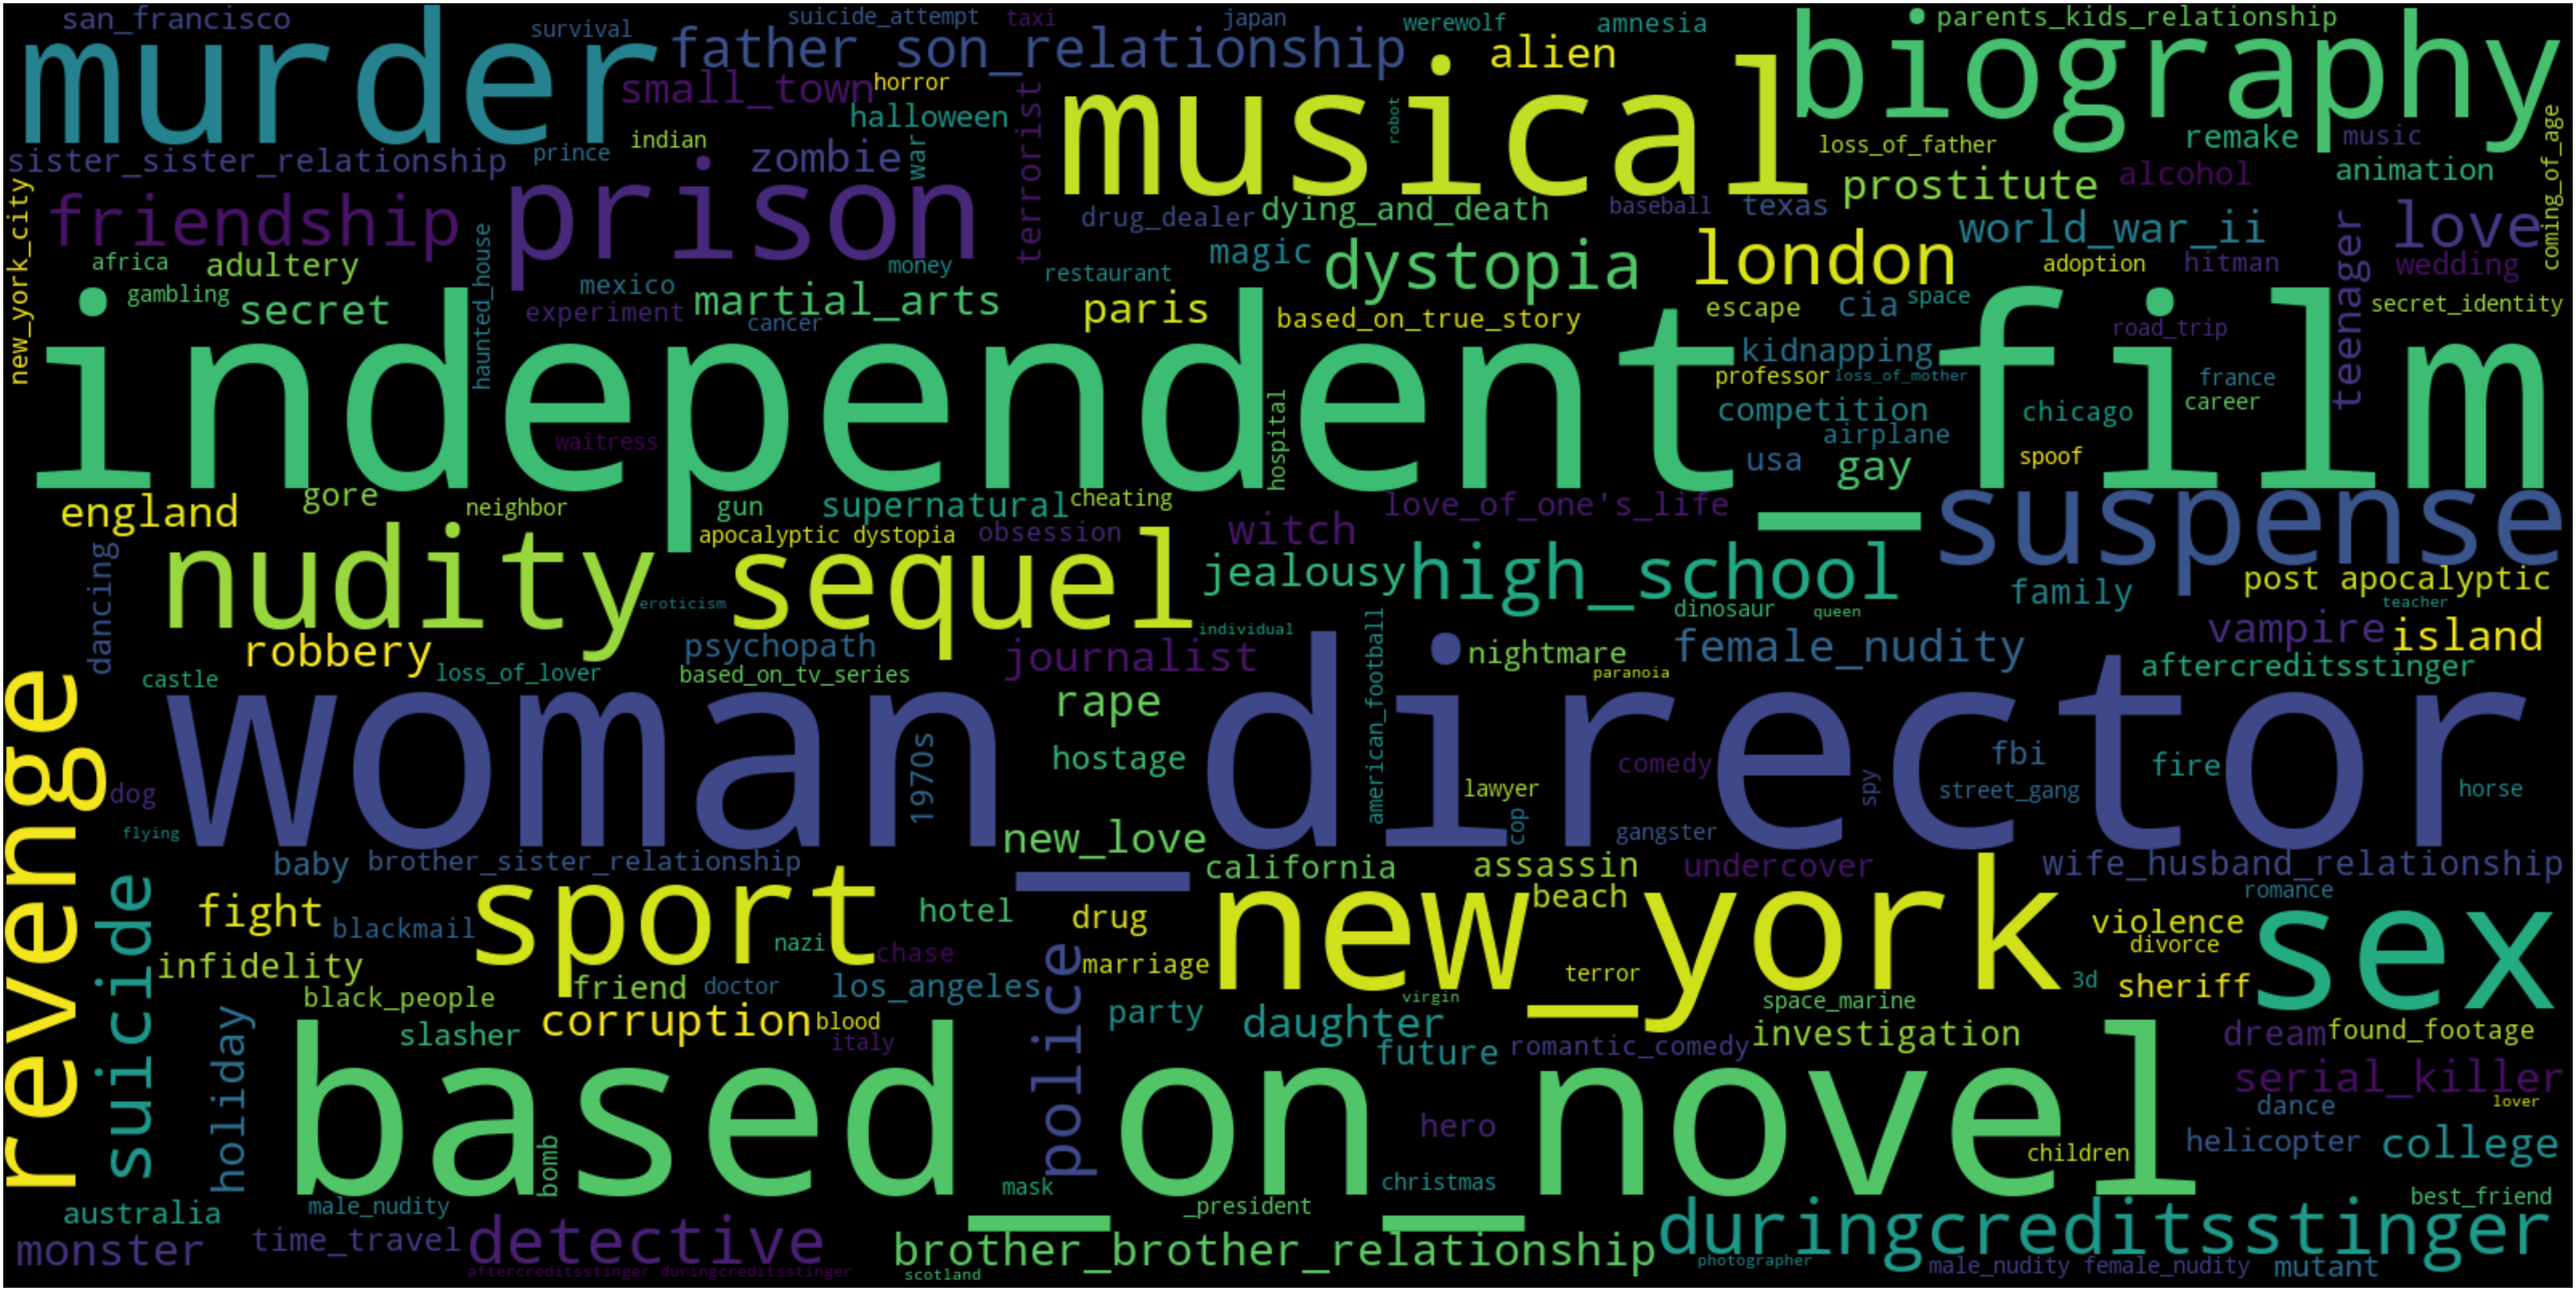

In [44]:

wordcloud=WordCloud(width=1600, height=800).generate(keywords)
plt.figure(figsize=(100,95))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




<p>From the word-cloud image,we can tell that 'women director','independent film' and 'woman director' are the most frequent keywords.</p>



<h2 id="What-are-the-best-movies-from-decade-to-another?">What are the best movies from decade to another?<a class="anchor-link" href="#What-are-the-best-movies-from-decade-to-another?">¶</a></h2>


In [45]:

grouper=(df_cleaned.release_date.dt.year//10).astype(str)+'0s' #release date to decade
grouper



0        2010s
1        2010s
2        2010s
3        2010s
4        2010s
         ...  
10861    1960s
10862    1960s
10863    1960s
10864    1960s
10865    1960s
Name: release_date, Length: 10865, dtype: object

In [46]:

df_cleaned.loc[df_cleaned.groupby(grouper).vote_weighted.idxmax().values]



tmdb_webpage  \
10141     https://www.themoviedb.org/movie/539   
7269      https://www.themoviedb.org/movie/238   
7309     https://www.themoviedb.org/movie/1891   
4178      https://www.themoviedb.org/movie/278   
2875      https://www.themoviedb.org/movie/155   
629    https://www.themoviedb.org/movie/157336   

                                imdb_webpage            original_title  \
10141  https://www.imdb.com/title/tt0054215/                    Psycho   
7269   https://www.imdb.com/title/tt0068646/             The Godfather   
7309   https://www.imdb.com/title/tt0080684/   The Empire Strikes Back   
4178   https://www.imdb.com/title/tt0111161/  The Shawshank Redemption   
2875   https://www.imdb.com/title/tt0468569/           The Dark Knight   
629    https://www.imdb.com/title/tt0816692/              Interstellar   

                                                    cast  \
10141  (Anthony Perkins, Vera Miles, John Gavin, Jane...   
7269   (Marlon Brando, Al Pacino, James Caan, Richard...   
7309   (Mark Hamill, Harrison Ford, Carrie Fisher, Bi...   
4178   (Tim Robbins, Morgan Freeman, Bob Gunton, Will...   
2875   (Christian Bale, Michael Caine, Heath Ledger, ...   
629    (Matthew McConaughey, Jessica Chastain, Anne H...   

                      director  \
10141      (Alfred Hitchcock,)   
7269   (Francis Ford Coppola,)   
7309         (Irvin Kershner,)   
4178         (Frank Darabont,)   
2875      (Christopher Nolan,)   
629       (Christopher Nolan,)   

                                                keywords  runtime  \
10141              (hotel, clerk, arizona, shower, rain)      109   
7269   (italy, love at first sight, loss of father, p...      175   
7309   (rebel, asteroid, space battle, snow storm, sp...      124   
4178   (prison, corruption, police brutality, prison ...      142   
2875   (dc comics, crime fighter, secret identity, sc...      152   
629    (saving the world, artificial intelligence, fa...      169   

                                     genres  \
10141             (Drama, Horror, Thriller)   
7269                         (Drama, Crime)   
7309   (Adventure, Action, Science Fiction)   
4178                         (Drama, Crime)   
2875       (Drama, Action, Crime, Thriller)   
629     (Adventure, Drama, Science Fiction)   

                                    production_companies release_date  \
10141                             (Shamley Productions,)   1960-08-14   
7269            (Paramount Pictures, Alfran Productions)   1972-03-15   
7309   (Lucasfilm, Twentieth Century Fox Film Corpora...   1980-01-01   
4178                        (Castle Rock Entertainment,)   1994-09-10   
2875   (DC Comics, Legendary Pictures, Warner Bros., ...   2008-07-16   
629    (Paramount Pictures, Legendary Pictures, Warne...   2014-11-05   

       vote_count  vote_weighted  cast_count  director_count  keywords_count  \
10141        1180            7.4           5               1               5   
7269         3970            8.0           5               1               5   
7309         3954            7.8           5               1               5   
4178         5754            8.2           5               1               5   
2875         8432            8.0           5               1               5   
629          6498            7.9           5               1               5   

       genres_count  production_companies_count  
10141             3                           1  
7269              2                           2  
7309              3                           2  
4178              2                           1  
2875              4                           4  
629               3                           5


<p>The brevious cell shows a data frame of the best movies from decade to another</p>



<p><a id="conclusions"></a></p>
<h1 id="Conclusions">Conclusions<a class="anchor-link" href="#Conclusions">¶</a></h1><ul>
<li>Warner Bros. has more high rated movies and movies with longer duration.</li>
<li>Universal Pictures has more low rated movies and movies with shorter duration.</li>
<li>Warner Bros. has got a correlation coeficeint of 0.45 which means that there's a positive-moderate liner relation between the duration and the movie rating.</li>
<li>Universal Pictures has got a correlation coeficeint of 0.35 which means that there's a positive-moderate liner relation between the duration and the movie rating. </li>
<li>The liner relation is stronger for Warner Bros. which means that Warner Bros. is more likely to receive higher rating ,for its longer movies and vice-versa,than Universal Pictures.</li>
<li>The production companies are more likely to relase thier movies on Fridays (weekend) </li>
</ul>
